**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [2]:
TXT_FOLDER_REGION = "fcc_crispri_growth"

## Import data

In [3]:
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)
vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

K562.hg38.CRISPRi_Growth.signif.bed.gz 
K562.hg38.CRISPRi_Growth.total.bed.gz 
summary 


In [4]:
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

description.tsv 
K562.hg38.CRISPRi_Growth.signif.tsv 
K562.hg38.CRISPRi_Growth.total.tsv 
metadata.label.tsv 


**Read column names**

In [5]:
### set file path
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
txt_fname = "description.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_cname     = dat
vec_txt_cname = dat$Name
fun_display_table(dat)

Name,Note
Chrom,Name of the chromosome
ChromStart,The starting position of the feature in the chromosome
ChromEnd,The ending position of the feature in the chromosome
Region,Region location
Guide_ID,ID of significant guide within the DHS
Log2FC,log2foldchange of the guide
Padj,Adjusted p value of the guide
Group,Assay Name
Label,Assay Name


**Read tables**

In [6]:
### set directory
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)
txt_fname  = "K562.hg38.CRISPRi_Growth.signif.bed.gz"
txt_fpath  = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, col_names = vec_txt_cname, show_col_types = FALSE)

### assign and show
dat_region_cgrowth_signif = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 6242    9


Chrom,ChromStart,ChromEnd,Region,Guide_ID,Log2FC,Padj,Group,Label
chr1,605550,605627,chr1:605550-605627,chr1.1.1,-0.9859338,0.0000000,CRISPRi-Growth,Signif
chr1,826642,827902,chr1:826642-827902,chr1.4.8,0.1855074,0.0325051,CRISPRi-Growth,Signif
chr1,964946,965136,chr1:964946-965136,chr1.41.7,-1.1466792,0.0000000,CRISPRi-Growth,Signif


In [7]:
### set directory
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)
txt_fname  = "K562.hg38.CRISPRi_Growth.total.bed.gz"
txt_fpath  = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, col_names = vec_txt_cname, show_col_types = FALSE)

### assign and show
dat_region_cgrowth_total = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 1092166       9


Chrom,ChromStart,ChromEnd,Region,Guide_ID,Log2FC,Padj,Group,Label
chr1,605550,605627,chr1:605550-605627,chr1.1.1,-0.9859338,0.0000000,CRISPRi-Growth,Total
chr1,605550,605627,chr1:605550-605627,chr1.1.2,0.0175568,0.8618381,CRISPRi-Growth,Total
chr1,605550,605627,chr1:605550-605627,chr1.1.3,0.0142221,0.9074943,CRISPRi-Growth,Total


## Explore data

### Number of guides and regions

In [8]:
### show information
dat = dat_region_cgrowth_total
tmp = dat %>% dplyr::filter(Padj <= 0.05)

cat("#Guide  (Total):     ", length(dat$Region),         "\n")
cat("#Region (Total):     ", length(unique(dat$Region)), "\n")
cat("#Guide  (padj<=0.05):", length(tmp$Region),         "\n")
cat("#Region (padj<=0.05):", length(unique(tmp$Region)), "\n")
cat("\n")

### show information
dat = dat_region_cgrowth_signif 

cat("#Guide  (Signif):", length(dat$Region),         "\n")
cat("#Region (Signif):", length(unique(dat$Region)), "\n")

#Guide  (Total):      1092166 
#Region (Total):      111702 
#Guide  (padj<=0.05): 8200 
#Region (padj<=0.05): 6242 

#Guide  (Signif): 6242 
#Region (Signif): 6242 


In [9]:
### double check
dat = dat_region_cgrowth_total
tmp = dat %>% 
    dplyr::filter(Padj <= 0.05) %>% 
    dplyr::group_by(Region) %>% 
    dplyr::slice_max(abs(Log2FC)) %>%
    dplyr::slice_min(Padj) %>%
    dplyr::ungroup()

### note: slice would keep the ties
print(nrow(tmp))

[1] 6244


### Distribution of log2 fold changes

In [10]:
### arrange effect size of total regions
dat = dat_region_cgrowth_total
dat = dat %>% dplyr::select(Region, Guide_ID, Log2FC)
dat = dat %>% dplyr::mutate(Label = "Total")
dat_region_arrange_total = dat

### get significant regions
### defined as regions w/ at least one significant guide
tmp = dat_region_cgrowth_signif 
vec = tmp$Region

### arrange effect size of significant regions
dat = dat_region_arrange_total
dat = dat %>% dplyr::filter(Region %in% vec)
dat = dat %>% dplyr::mutate(Label = "Significant")
dat_region_arrange_signf = dat

**Plot the whole distribution of guides**

Warning message:
“Removed 27061 rows containing non-finite outside the scale range
(`stat_ydensity()`).”


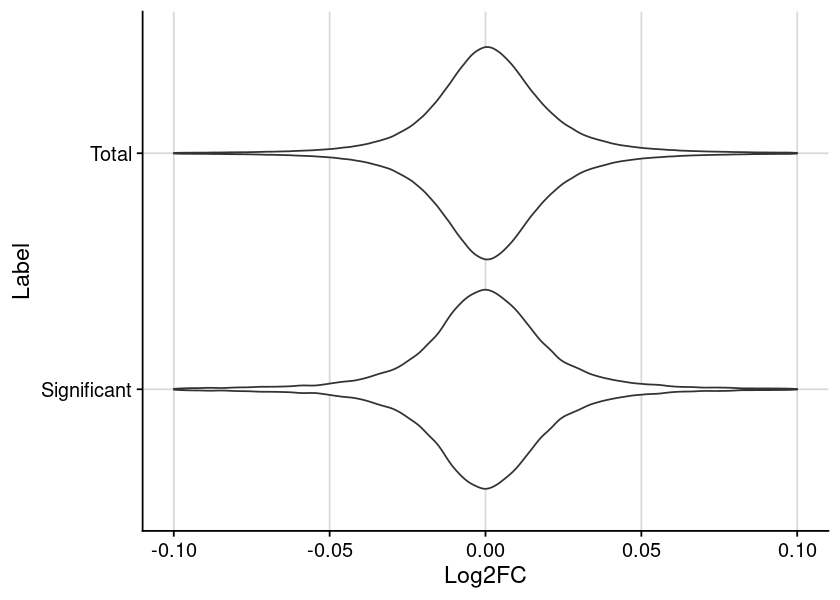

In [11]:
### combine tables
dat = bind_rows(
    dat_region_arrange_total,
    dat_region_arrange_signf
)

### plot distribution
gpt = ggplot(dat, aes(x=Log2FC, y = Label)) + 
    geom_violin() +
    theme_cowplot() +
    background_grid() +
    xlim(-0.1, 0.1)

options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

**Plot the mean(log2fc) of regions**

Warning message:
“Removed 402 rows containing non-finite outside the scale range
(`stat_ydensity()`).”


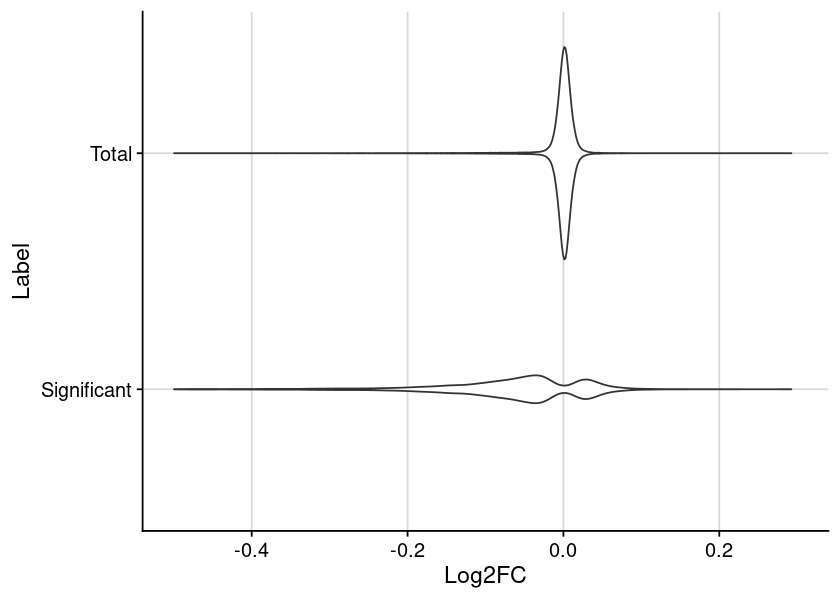

In [12]:
### combine tables
dat = bind_rows(
    dat_region_arrange_total,
    dat_region_arrange_signf
)

### take average of log2fc by regions
dat = dat %>% 
    dplyr::group_by(Region, Label) %>% 
    dplyr::summarise(Log2FC = mean(Log2FC), .groups = "drop")

### plot distribution
gpt = ggplot(dat, aes(x=Log2FC, y=Label)) + 
    geom_violin() +
    theme_cowplot() +
    background_grid() +
    xlim(-0.5, 0.3)

options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

## Save figures

In [13]:
### set text size
theme_text = theme(
    title      = element_text(size = 16),
    axis.title = element_text(size = 16),
    axis.text  = element_text(size = 14)
)

Warning message:
“Removed 201 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 201 rows containing non-finite outside the scale range (`stat_density()`).”


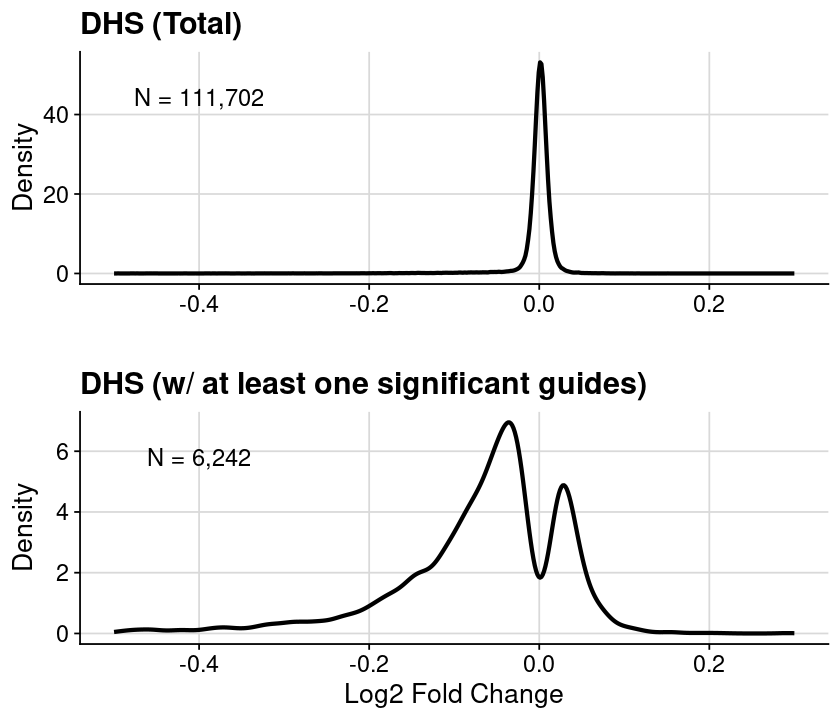

In [14]:
### combine tables
dat = bind_rows(
    dat_region_arrange_total,
    dat_region_arrange_signf
)

### take average of log2fc by regions
dat = dat %>% 
    dplyr::group_by(Region, Label) %>% 
    dplyr::summarise(Log2FC = mean(Log2FC), .groups = "drop")

### split and define plot titles
lst = split(dat, dat$Label)
lst = list(
    "DHS (Total)" = lst[["Total"]],
    "DHS (w/ at least one significant guides)" = lst[["Significant"]]
)

### plot distribution by loop
lst = lapply(names(lst), function(idx){
    ### init: data
    dat = lst[[idx]]

    ### text annotation
    txt_title = idx
    txt_annot = paste("N =", scales::comma(nrow(dat)))
    
    ### plot distribution
    gpt = ggplot(dat, aes(x=Log2FC)) + 
        geom_density(linewidth = 1.2) +
        theme_cowplot() +
        background_grid() +
        labs(x = "Log2 Fold Change", y = "Density", title = txt_title) +
        annotate(
            "text", 
            x = -0.4, 
            y = Inf,
            size  = 5,
            vjust = 3.0,
            label = txt_annot)
    return(gpt)
})

### Further modification of plots
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        xlim(-0.5, 0.3) +
        theme_text
    return(gpt)
})
lst[[1]] = lst[[1]] + labs(x = "")

### create and assign plot
plt = plot_grid(plotlist = lst, ncol = 1, align = "v")
plt_export = plt

### show plot
options(repr.plot.height=6, repr.plot.width=7)
print(plt)

In [15]:
txt_fdiry = "./"
txt_fname = "fig.region.fcc_crispri_growth.distribution.log2fc.png"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 6, width = 7, units = "in")

txt_fdiry = "./"
txt_fname = "fig.region.fcc_crispri_growth.distribution.log2fc.svg"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 6, width = 7, units = "in")